We can use principal component analysis (PCA) for the following purposes:
* To reduce the number of dimensions in the dataset.
* To find patterns in the high-dimensional dataset

**Eigenvectors and eigenvalues**
The eigenvectors and eigenvalues ​​of a covariance matrix (or correlation) describe the source of the PCA. Eigenvectors (main components) determine the direction of the new attribute space, and eigenvalues ​​determine its magnitude.

In [1]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [3]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [4]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [5]:
# Import the required variables
import pandas as pd
import numpy as np

# Read the data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)
SDGs_Ranks_2021 = pd.read_excel ("../data/processed/SDGs_Ranks_2021.xlsx", index_col = 0)
SDGs_Scores_2021 = pd.read_excel ("../data/processed/SDGs_Scores_2021.xlsx", index_col = 0)

# Only consider the 2021 year
Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita[[2021]]
Res_Nonhydro_Capita_2021= Res_Nonhydro_Capita_2021.rename(columns={ 2021: 'Res_Nonhydro_Capita_2021'})

# Do not consider the first column
SDGs_Ranks_2021 = SDGs_Ranks_2021.iloc[:,1:]
SDGs_Scores_2021 = SDGs_Scores_2021.iloc[:,1:]

#
# PARA CLASIFICACIÓN
#
# Dicotomize Res_Nonhydro_Capita_2021
# Res_Nonhydro_Capita_2021_backup = Res_Nonhydro_Capita_2021.copy()
# median = Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021'].median()
# Res_Nonhydro_Capita_2021['Res_Nonhydro_Capita_2021'] = Res_Nonhydro_Capita_2021.Res_Nonhydro_Capita_2021.map(lambda x: 1 if x >= median else 0)
# Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita_2021.rename(columns={'Res_Nonhydro_Capita_2021': 'Wealthy'})


# Append the target to the Datasets
SDGs_Ranks_2021 = pd.concat([SDGs_Ranks_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Scores_2021 = pd.concat([SDGs_Scores_2021, Res_Nonhydro_Capita_2021], axis=1)

# Predicciones - Modelo PCA SDGs_Scores_2021

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#
# PARA CLASIFICACIÓN
#
# X = SDGs_Scores_2021.drop('Wealthy',1)
# y = SDGs_Scores_2021['Wealthy']

#
# PARA REGRESION
#
X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

numFeatures = len(X.columns)
scaler = StandardScaler()

scaler.fit(X)
df_scaled = scaler.transform(X)
df_scaled

pca = PCA(n_components=numFeatures)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled) 

loadings = pca.components_
pca.explained_variance_


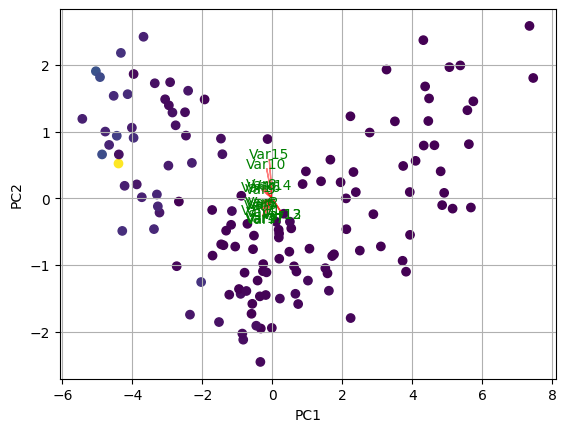

In [24]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(X_pca[:,0:2], pca.components_.T) 
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.55340987 0.63510178 0.70164881 0.75758505 0.80668303 0.84933309
 0.88150541 0.9069294  0.92376345 0.93939312 0.95209841 0.9643309
 0.9736466  0.98194987 0.98925528 0.99604514 1.        ]


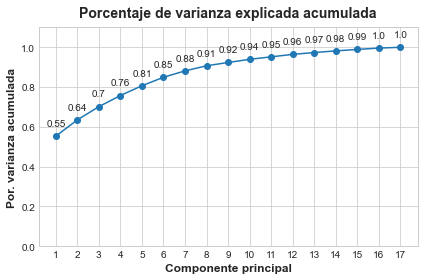

In [7]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
numFeatures = len(X.columns) # Numebr of PCAs to plot, this case all the features

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(numFeatures) + 1,
    prop_varianza_acum,
    marker = 'o'
)

# for i, j in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
for i, j in zip(np.arange(numFeatures) + 1, prop_varianza_acum):
    label = round(j, 2)
    ax.annotate(
        label,
        (i,j),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Feat. Red

In [8]:
# Me quedo con 3 componentes
pca3 = PCA(n_components=3)
pca3.fit(df_scaled)
X_pca3 = pca3.transform(df_scaled) # Proyección de las variables dependientes en el espacio definido por las componentes
df_final = pd.DataFrame(X_pca3, columns=['PC1','PC2','PC3'], index = X.index)
df_final.head()


,PC1,PC2,PC3
Country,,,
Afghanistan,5.154694,-0.153845,1.715278
Algeria,0.198678,-0.905189,1.205980
Angola,4.813406,0.405327,-0.743777
Argentina,-1.230778,-1.444404,-0.516953
Armenia,-0.267803,-1.091280,0.503442


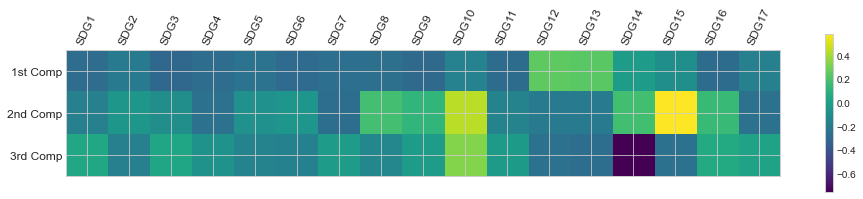

In [9]:
# plt.figure(figsize=(20,20))
plt.matshow(pca3.components_[0:3], cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [10]:
pd.DataFrame(data=pca.components_[0:3], columns=X.columns, index=['PC1','PC2','PC3'])

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
PC1,-0.274406,-0.203687,-0.309827,-0.276474,-0.244159,-0.288089,-0.267114,-0.259398,-0.294168,-0.161216,-0.284047,0.249302,0.238262,-0.013257,-0.087008,-0.281513,-0.17439
PC2,-0.173780,-0.044887,-0.091599,-0.256229,-0.077387,-0.052328,-0.270693,0.183006,0.123832,0.446112,-0.155806,-0.201648,-0.202684,0.177436,0.583137,0.152456,-0.25121
PC3,0.040663,-0.174940,0.033951,-0.069518,-0.154271,-0.168842,-0.017003,-0.137168,-0.019976,0.335267,-0.025096,-0.258173,-0.270776,-0.755325,-0.248815,0.064794,0.01780


# Proyecciones con 3 PCAs y Wealthy

In [82]:
Wealthy = Res_Nonhydro_Capita_2021.copy()
median = Wealthy['Res_Nonhydro_Capita_2021'].median()
Wealthy['Res_Nonhydro_Capita_2021'] = Wealthy.Res_Nonhydro_Capita_2021.map(lambda x: 1 if x >= median else 0)
Wealthy = Wealthy.rename(columns={'Res_Nonhydro_Capita_2021': 'Wealthy'})
proyecciones = pd.concat([Wealthy, df_final], axis=1)
display(proyecciones)

,Wealthy,PC1,PC2,PC3
Country,,,,
Afghanistan,0,5.154694,-0.153845,1.715278
Algeria,0,0.198678,-0.905189,1.205980
Angola,0,4.813406,0.405327,-0.743777
Argentina,1,-1.230778,-1.444404,-0.516953
Armenia,0,-0.267803,-1.091280,0.503442
...,...,...,...,...
"Venezuela, RB",0,2.117605,-0.462478,-1.027660
Vietnam,0,-0.571632,-1.580803,0.329428
"Yemen, Rep",0,5.677535,-0.137230,-0.032209
